## Atividade 1 - Analisando dados de ocorrências de feminicídio na cidade de São Paulo

### Nome: Letícia Saraiva Chaves, 402120

Algumas perguntas com relação ao dataset podem ser respondidas
- Como os índices de feminicídio evoluíram em relação ao tempo e como podem evoluir nos próximos anos?
- Quais foram os períodos com maiores taxas nos últimos anos?
- Quais são os logradouros, tipos de locais, bairros e regiões com maiores índices?
- Quais são os dias da semana, horários com maiores índices?

Dataset disponível em: http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

###### Os dados coletados para análise foram os dos três últimos anos (2017 - 2019).

Primeiro fazemos a leitura dos dados que estão dispostos em arquivos com extensão '.xlsx' dos meses de cada ano e em seguida concatenamos em um único dataset. Salvamos em listas a quantidade de ocorrências registradas com pessoas do sexo feminino em cada mês dos anos do dataset.

In [1]:
# Leitura dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

list2017 = []
list2018 = []
list2019 = []

dt1 = pd.read_excel('Dados/DadosBO_2017_1(FEMINICÍDIO).xlsx', sep='\t', encoding='utf-16-le')
dt2 = pd.read_excel('Dados/DadosBO_2018_1(FEMINICÍDIO).xlsx', sep='\t', encoding='utf-16-le')
dt3 = pd.read_excel('Dados/DadosBO_2019_1(FEMINICÍDIO).xlsx', sep='\t', encoding='utf-16-le')

list2017.append(dt1[dt1['SEXO'] == 'Feminino'].shape[0])
list2018.append(dt2[dt2['SEXO'] == 'Feminino'].shape[0])
list2019.append(dt3[dt3['SEXO'] == 'Feminino'].shape[0])

dt_new = pd.concat([dt1,dt2,dt3])

for i in range(2,13):
    dt1 = pd.read_excel('Dados/DadosBO_2017_'+str(i)+'(FEMINICÍDIO).xlsx', sep='\t', encoding='utf-16-le')
    dt2 = pd.read_excel('Dados/DadosBO_2018_'+str(i)+'(FEMINICÍDIO).xlsx', sep='\t', encoding='utf-16-le')
    
    list2017.append(dt1[dt1['SEXO'] == 'Feminino'].shape[0])
    list2018.append(dt2[dt2['SEXO'] == 'Feminino'].shape[0])
    
    dt_new = pd.concat([dt_new, dt1, dt2])
    if i < 7:
        dt3 = pd.read_excel('Dados/DadosBO_2019_'+str(i)+'(FEMINICÍDIO).xlsx', sep='\t', encoding='utf-16-le')
        
        list2019.append(dt3[dt3['SEXO'] == 'Feminino'].shape[0])
        
        dt_new = pd.concat([dt_new, dt3])

dt_new.shape

(749, 56)

In [2]:
#Listando todas as colunas do dataset

dt_new.columns

Index(['ANO_BO', 'NUM_BO', 'NUMERO_BOLETIM', 'BO_INICIADO', 'BO_EMITIDO',
       'DATAOCORRENCIA', 'PERIDOOCORRENCIA', 'DATACOMUNICACAO',
       'DATAELABORACAO', 'BO_AUTORIA', 'FLAGRANTE', 'NUMERO_BOLETIM_PRINCIPAL',
       'LOGRADOURO', 'NUMERO', 'BAIRRO', 'CIDADE', 'UF', 'LATITUDE',
       'LONGITUDE', 'DESCRICAOLOCAL', 'EXAME', 'SOLUCAO', 'DELEGACIA_NOME',
       'DELEGACIA_CIRCUNSCRICAO', 'ESPECIE', 'RUBRICA', 'DESDOBRAMENTO',
       'STATUS', 'NOMEPESSOA', 'TIPOPESSOA', 'VITIMAFATAL', 'RG', 'RG_UF',
       'NATURALIDADE', 'NACIONALIDADE', 'SEXO', 'DATANASCIMENTO', 'IDADE',
       'ESTADOCIVIL', 'PROFISSAO', 'GRAUINSTRUCAO', 'CORCUTIS',
       'NATUREZAVINCULADA', 'TIPOVINCULO', 'RELACIONAMENTO', 'PARENTESCO',
       'PLACA_VEICULO', 'UF_VEICULO', 'CIDADE_VEICULO', 'DESCR_COR_VEICULO',
       'DESCR_MARCA_VEICULO', 'ANO_FABRICACAO', 'ANO_MODELO',
       'DESCR_TIPO_VEICULO', 'QUANT_CELULAR', 'MARCA_CELULAR'],
      dtype='object')

## Pré-processamento

Antes de analisar, caso necessário, realiza um procedimento de limpeza de dados, como remover duplicados, tratar strings, converter dados para outros formatos, criar novas colunas como dia do mês, da semana e mês.

**P.S.**: *Essa pode ser a fase mais demorada de todo o desafio.*

In [3]:
#Identificando dados faltantes

dt_new.isnull().sum()

ANO_BO                        0
NUM_BO                        0
NUMERO_BOLETIM                0
BO_INICIADO                   0
BO_EMITIDO                    0
DATAOCORRENCIA                0
PERIDOOCORRENCIA              0
DATACOMUNICACAO               0
DATAELABORACAO                0
BO_AUTORIA                    0
FLAGRANTE                     0
NUMERO_BOLETIM_PRINCIPAL    634
LOGRADOURO                  522
NUMERO                        5
BAIRRO                       19
CIDADE                        5
UF                            5
LATITUDE                    522
LONGITUDE                   522
DESCRICAOLOCAL                0
EXAME                       102
SOLUCAO                       0
DELEGACIA_NOME                0
DELEGACIA_CIRCUNSCRICAO       0
ESPECIE                       0
RUBRICA                       0
DESDOBRAMENTO               206
STATUS                        0
NOMEPESSOA                   81
TIPOPESSOA                   81
VITIMAFATAL                  81
RG      

Com a informação acima, conseguimos perceber que há muitos dados faltantes, além de terem muitas colunas que não foram preenchidas nenhuma vez, sendo assim, podemos removê-las.

In [4]:
#Removendo colunas sem preenchimentos

dt_new = dt_new.drop(['NUMERO_BOLETIM_PRINCIPAL', 'LATITUDE', 'LONGITUDE', 'PARENTESCO', 'DESCR_COR_VEICULO', 'PLACA_VEICULO', 'QUANT_CELULAR', 'DESCR_MARCA_VEICULO', 'DESCR_TIPO_VEICULO', 'MARCA_CELULAR', 'DESDOBRAMENTO', 'ANO_MODELO', 'ANO_FABRICACAO', 'CIDADE_VEICULO', 'UF_VEICULO'], axis=1)

In [5]:
#Transformando strings para lowercase

for dt in dt_new.columns.values:
    try:
        dt_new[dt] = dt_new[dt].str.lower()
    except:
        x = 1

In [6]:
dt_new

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,...,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,RELACIONAMENTO
0,2017,19,19/2017,01/01/2017 18:37:30,01/01/2017 21:44:17,01/01/2017,a tarde,01/01/2017,01/01/2017 18:37:30,conhecida,...,feminino,1955-11-06,61.0,solteiro,aposentado(a),1 grau completo,parda,"homicídio qualificado (art. 121, §2o.)",vítima,NaN
1,2017,147,147/2017,11/01/2017 10:14:46,11/01/2017 15:24:39,11/01/2017,pela manhã,11/01/2017,11/01/2017 10:14:46,conhecida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017,147,147/2017,11/01/2017 10:14:46,11/01/2017 15:24:39,11/01/2017,pela manhã,11/01/2017,11/01/2017 10:14:46,conhecida,...,feminino,1978-07-09,38.0,casado,auxiliar de producao,2 grau completo,parda,"homicídio qualificado (art. 121, §2o.)",vítima,casamento
3,2017,336,336/2017,12/01/2017 05:04:31,12/01/2017 08:50:19,11/01/2017,a noite,12/01/2017,12/01/2017 05:04:31,conhecida,...,feminino,1985-06-19,31.0,casado,vigilante,2 grau completo,branca,"homicídio qualificado (art. 121, §2o.)",vítima,NaN
4,2017,336,336/2017,12/01/2017 05:04:31,12/01/2017 08:50:19,11/01/2017,a noite,12/01/2017,12/01/2017 05:04:31,conhecida,...,feminino,1985-06-19,31.0,casado,vigilante,2 grau completo,branca,"homicídio qualificado (art. 121, §2o.)",vítima,NaN
5,2017,336,336/2017,12/01/2017 05:04:31,12/01/2017 08:50:19,11/01/2017,a noite,12/01/2017,12/01/2017 05:04:31,conhecida,...,feminino,1985-06-19,31.0,casado,vigilante,2 grau completo,branca,"homicídio qualificado (art. 121, §2o.)",vítima,NaN
6,2017,336,336/2017,12/01/2017 05:04:31,12/01/2017 08:50:19,11/01/2017,a noite,12/01/2017,12/01/2017 05:04:31,conhecida,...,feminino,1985-06-19,31.0,casado,vigilante,2 grau completo,branca,"homicídio qualificado (art. 121, §2o.)",vítima,NaN
7,2017,57,57/2017,15/01/2017 17:11:27,15/01/2017 18:57:28,15/01/2017,a tarde,15/01/2017,15/01/2017 17:11:27,conhecida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017,57,57/2017,15/01/2017 17:11:27,15/01/2017 18:57:28,15/01/2017,a tarde,15/01/2017,15/01/2017 17:11:27,conhecida,...,feminino,1959-07-01,57.0,separado,auxiliar de enfermagen,2 grau completo,branca,"homicídio qualificado (art. 121, §2o.)",vítima,casamento
9,2017,469,469/2017,18/01/2017 23:43:49,19/01/2017 06:21:08,18/01/2017,a noite,18/01/2017,18/01/2017 23:43:49,conhecida,...,feminino,1997-06-08,19.0,solteiro,atendente de lanchanote,2 grau completo,parda,violência doméstica,vítima,parentesco


In [7]:
#Removendo linhas em que o sexo não foi preenchido (o elemento é nulo)

dt_new = dt_new.dropna(subset=['SEXO'])

In [27]:
#Descobrindo a idade média no dataset
idadeMedia = dt_new['IDADE'].mean()

#Arredondando a idade obtida
idadeMedia = math.floor(idadeMedia)

print('A idade média do dataset é {} anos'.format(idadeMedia))

#Dando update nos valores nulos em IDADE
dt_new.update(dt_new['IDADE'].fillna(idadeMedia));


A idade média do dataset é 36 anos


Para evitar problemas com a parte de análise exploratória dos dados, escolhi preencher os valores que estavam nulos pelo valor 'não cadastrado'.

In [9]:
#Preencher os valores nulos
dt_new = dt_new.fillna('não cadastrado')

dt_new.isnull().sum()

ANO_BO                     0
NUM_BO                     0
NUMERO_BOLETIM             0
BO_INICIADO                0
BO_EMITIDO                 0
DATAOCORRENCIA             0
PERIDOOCORRENCIA           0
DATACOMUNICACAO            0
DATAELABORACAO             0
BO_AUTORIA                 0
FLAGRANTE                  0
LOGRADOURO                 0
NUMERO                     0
BAIRRO                     0
CIDADE                     0
UF                         0
DESCRICAOLOCAL             0
EXAME                      0
SOLUCAO                    0
DELEGACIA_NOME             0
DELEGACIA_CIRCUNSCRICAO    0
ESPECIE                    0
RUBRICA                    0
STATUS                     0
NOMEPESSOA                 0
TIPOPESSOA                 0
VITIMAFATAL                0
RG                         0
RG_UF                      0
NATURALIDADE               0
NACIONALIDADE              0
SEXO                       0
DATANASCIMENTO             0
IDADE                      0
ESTADOCIVIL   

In [10]:
#Verificando dados duplicados

dups = dt_new.duplicated()
print('Número de linhas duplicadas = %d' % (dups.sum()))

Número de linhas duplicadas = 153


In [11]:
#Descartando linhas duplicadas

dt2 = dt_new.drop_duplicates()

## Análise Exploratória

Agora é a hora de descobrir relações e algumas *hidden informations* do dataset. 

#### Como os índices de feminicídio evoluíram em relação ao tempo e como podem evoluir nos próximos anos?

In [12]:
#Verificar quantidade de BO's registrados em cada ano

years, counts = np.unique(dt_new.iloc[:,0],return_counts=True)
print(years, counts)

[2017 2018 2019] [266 250 148]


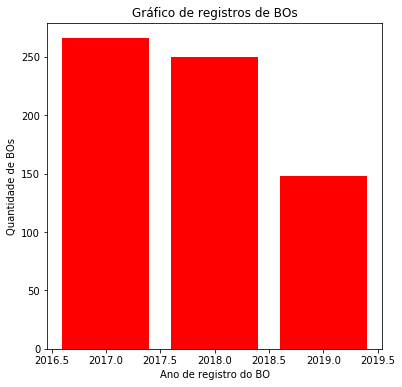

In [13]:
#Gráfico com os registros de BO's nos anos de 2017, 2018, 2019.

plt.figure(figsize=(6,6))
#plt.grid()
plt.xlabel('Ano de registro do BO')
plt.ylabel('Quantidade de BOs')
plt.title('Gráfico de registros de BOs')
plt.bar(years, counts, color='r')
plt.show();

Como podemos observar no gráfico acima, os registros de BO's, logo, as ocorrências, diminuíram de 2017 para 2018. Como os dados de 2019 são apenas até o mês de Junho, não é possível afirmar se terá menos ou mais registros que 2018. Porém, como na metade do ano de 2019 já houveram mais registros de ocorrência que na metade do ano de 2018, podemos dizer que os registros tendem a aumentar ou se manter do ano passado para cá.

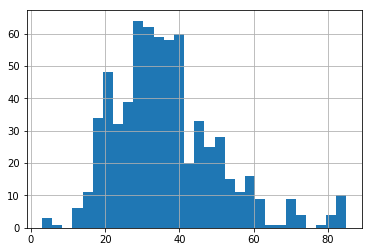

In [14]:
dt_new['IDADE'].hist(bins=30);

Segundo o histograma acima, as pessoas que mais registraram BO nesses anos tinham, em média, 30 anos.

#### Quais foram os períodos com maiores taxas nos últimos anos?

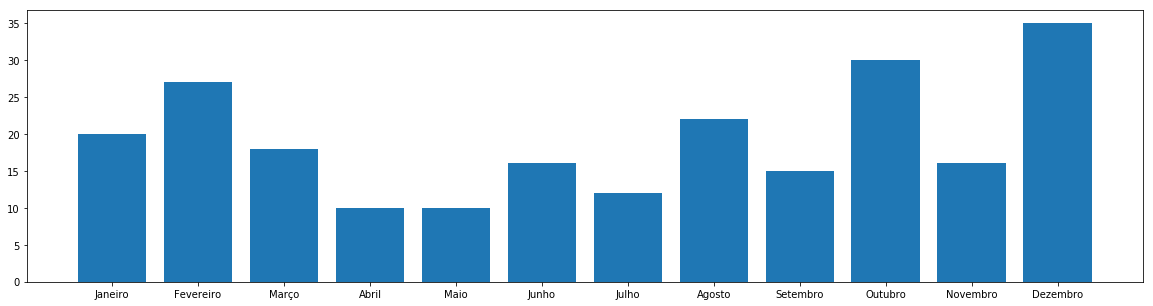

In [15]:
#Ocorrências registradas no ano 2017
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
plt.figure(figsize=(20,5))
plt.bar(meses, list2017);

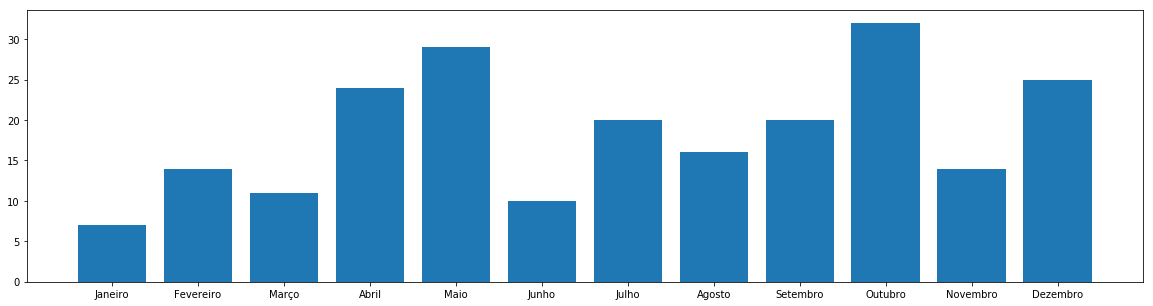

In [16]:
#Ocorrências registradas no ano 2018
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
plt.figure(figsize=(20,5))
plt.bar(meses, list2018);

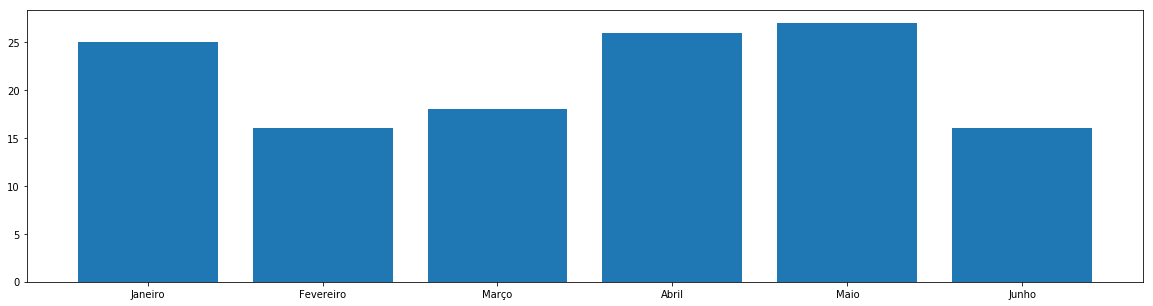

In [17]:
#Ocorrências registradas até junho do ano de 2019
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho']
plt.figure(figsize=(20,5))
plt.bar(meses, list2019);

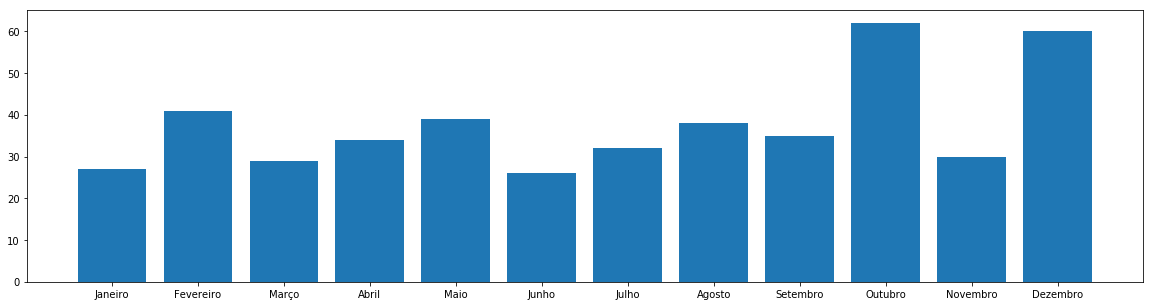

In [18]:
#Dados dos anos de 2017 e 2018 juntos
dados = np.array(list2017) + np.array(list2018)

meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
plt.figure(figsize=(20,5))
plt.bar(meses, dados);

Analisando os anos de 2017 e 2018, foi possível perceber que os meses em que há mais registros de BO's são os meses de Outubro, Dezembro e Fevereiro, em ordem decrescente. Outubro é o mês que mais ocorre feminicídio. 

#### Quais são os dias da semana, horários com maiores índices?


Primeiro precisamos criar uma nova coluna com o dia da semana que aconteceu a ocorrência.

In [19]:
dt_new['DATAOCORRENCIA'] = pd.to_datetime(dt_new['DATAOCORRENCIA'], format='%d/%m/%Y')

diaDaSemana = ['domingo', 'segunda', 'terca', 'quarta', 'quinta', 'sexta', 'sabado']
converteDiaDaSemana = lambda x : diaDaSemana[x.dayofweek]
dt_new['DIASEMANA'] = dt_new['DATAOCORRENCIA'].apply(converteDiaDaSemana)


Podemos ver o percentual de ocorrências de crimes por dia da semana.

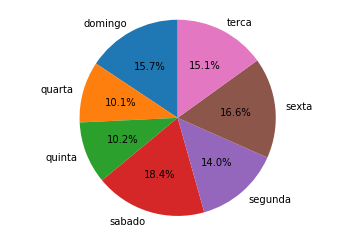

In [20]:
labels, titulos = np.unique(dt_new['DIASEMANA'],return_counts=True)
total = sum(titulos)
plt.pie(titulos, labels=labels, autopct='%1.1f%%', startangle=90)

# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

Podemos ver o percentual de ocorrências de crimes por período do dia.

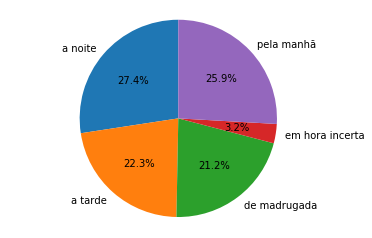

In [21]:
labels, titulos = np.unique(dt_new['PERIDOOCORRENCIA'],return_counts=True)
total = sum(titulos)
plt.pie(titulos, labels=labels, autopct='%1.1f%%', startangle=90)

# Determina que as proporções sejam iguais ('equal') de modo a desenhar o círculo
plt.axis('equal') 
plt.show()

Conseguimos perceber que a maioria das ocorrências acontecem no final de semana (sexta, sábado e domingo) e geralmente no período da noite ou pela manhã, de acordo com os gráficos.

#### Quais são os logradouros, tipos de locais, bairros e regiões com maiores índices?

In [22]:
names, qtds = np.unique(dt_new['BAIRRO'],return_counts=True)


In [23]:
#Pegando os 7 primeiros bairros em que há mais ocorrências

maxs = (-qtds).argsort() #Ordenação dos valores em ordem decrescente
bairros = names[maxs[:7]]
qtd = qtds[maxs[:7]]

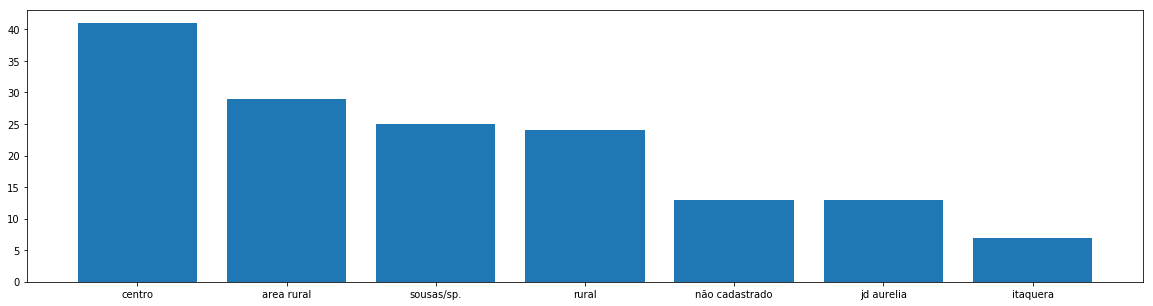

In [24]:
plt.figure(figsize=(20,5))
plt.bar(bairros, qtd);

Os bairros que há mais ocorrências são os bairros do Centro, a Área Rural e em Sousas.

In [25]:
#10 cidades que há mais registros de ocorrência

cdd,qtds = np.unique(dt_new['CIDADE'],return_counts=True)
maxs = (-qtds).argsort() #Ordenação dos valores em ordem decrescente
cidades = cdd[maxs[:10]]
qtd = qtds[maxs[:10]]

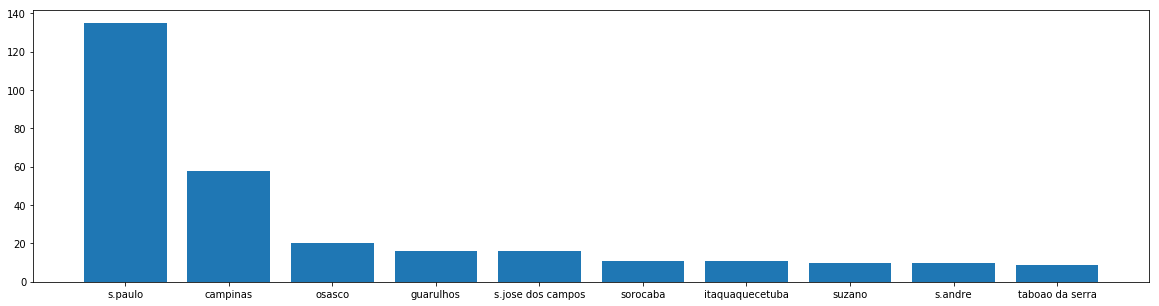

In [26]:
plt.figure(figsize=(20,5))
plt.bar(cidades, qtd);

As cidades em que há mais ocorrências são as cidades de São Paulo, Campinas, Osasco e Guarulhos.

#### FIM